In [1]:
from keras.datasets import mnist


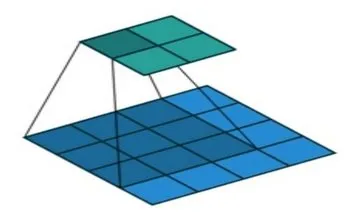

## Step 1: Loading the dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


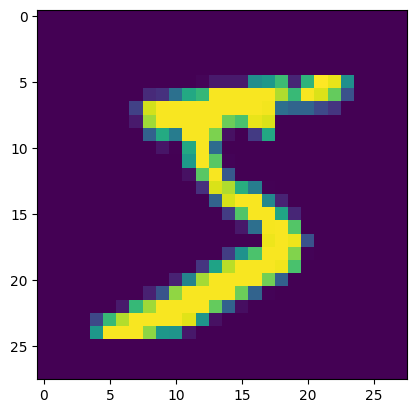

In [3]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])


In [4]:
X_train[0].shape


(28, 28)

Next, we need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. The first number is the number of images (60,000 for X_train and 10,000 for X_test). Then comes the shape of each image (28x28). The last number is 1, which signifies that the images are greyscale.

In [5]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)


In [5]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Building our model

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [7]:
# create our model 
model = Sequential() 

# add more layers 
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


## Compiling our model

In [8]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training our model

In [9]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)


Epoch 1/3


1875/1875 [==============================] - 49s 25ms/step - loss: 0.3132 - accuracy: 0.9473 - val_loss: 0.1265 - val_accuracy: 0.9614
Epoch 2/3
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0759 - accuracy: 0.9769 - val_loss: 0.0884 - val_accuracy: 0.9759
Epoch 3/3
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0521 - accuracy: 0.9838 - val_loss: 0.1019 - val_accuracy: 0.9735


model.predict(X_test[:4])


In [10]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Building our first project using CNN

### What is CNN ? 
- cnn helps in image recognition from the dataset mainly. 


### How CNN works ? 
- the process of obtaining the multiple images from single image is called as convolution.
- the process of reducing the size of that image is called as the pooling.
- we created multiple images from the single image with different filters.
- we will convert these images into the single row means into the single vectors and we can use neural network.
- we will train our model based on that.
- in this CNN works


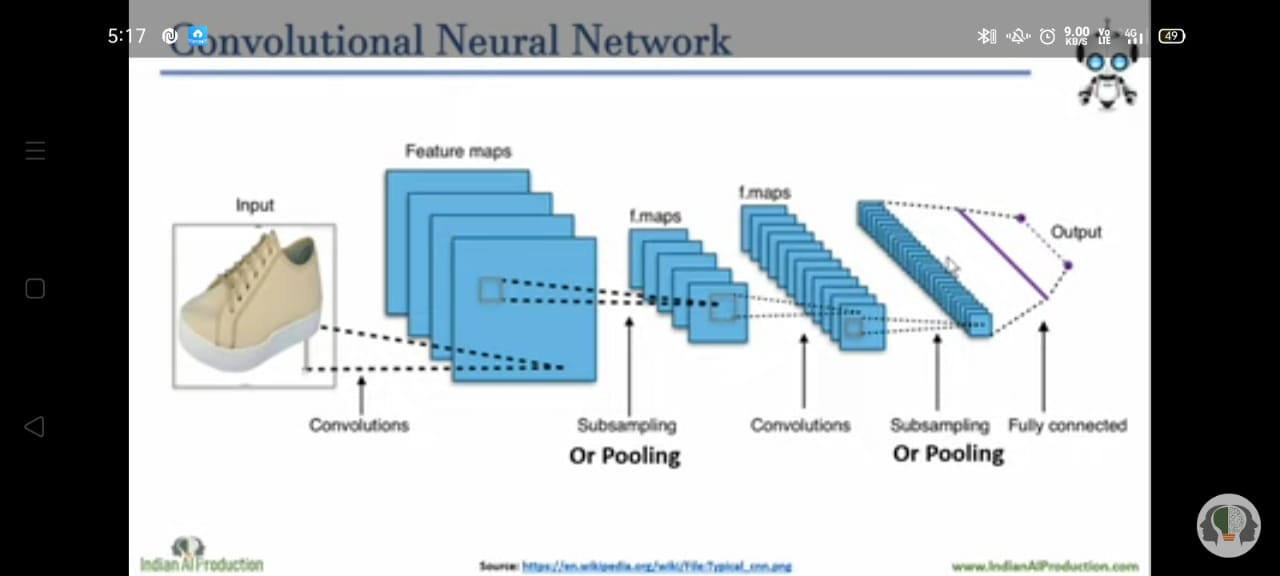


### Project Arcitecture - Fashion Classification

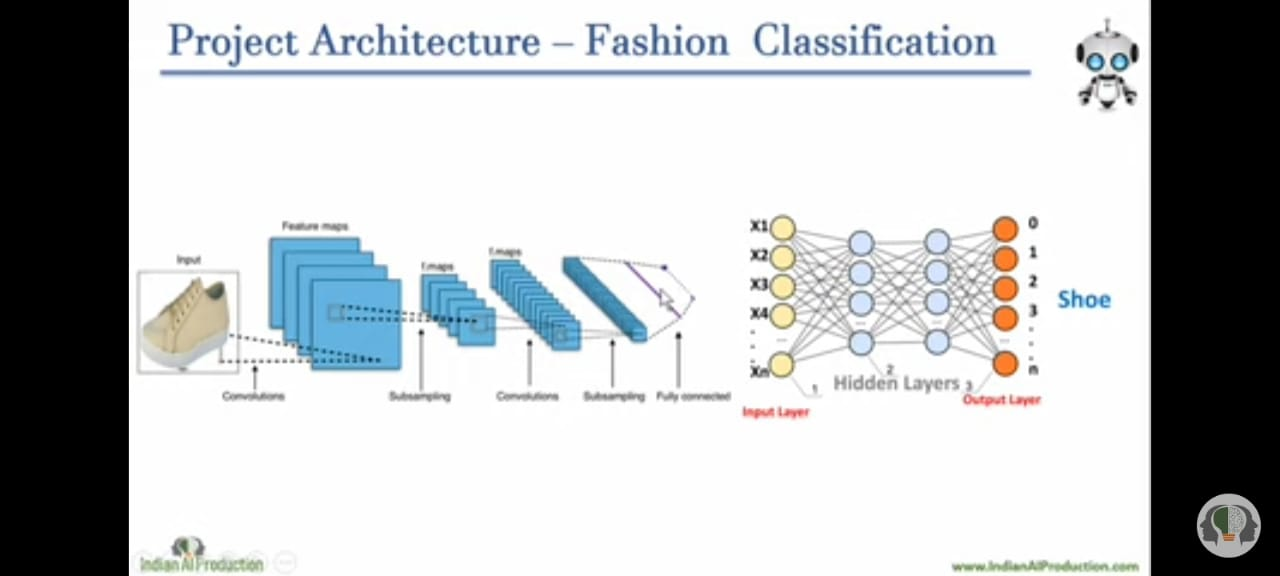

#### The neurons in the neural network will depend on the dataset. in the output layer we will have the classes as shown in the above figure. 
#### The neuron with the greater probability will be consider as the best match. 
#### we create multiple images of the single images with the help of the filter  
#### the filter can be such as the bluring filter, the gaussian gray filter. 

# Building the convolutional neural network

# Project Fashion - Classification - End to End 
Train the convolutional neural network 60,000 fashion minist images (data in Np array) 

test the convolutional neural network on 10,000 fashion minist images (data in np array)

### Import Libraries

In [11]:
import numpy as np 
import matplotlib.pyplot as plt # for showing images
import seaborn as sns # for showing images
import keras
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


print('imported library succesfully')

imported library succesfully


## Load Data

In [12]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [13]:
X_train.shape,y_train.shape
# 28 rows 
# 28 columns 
# 60,000 lables

((60000, 28, 28), (60000,))

In [14]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [15]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [16]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [17]:
y_train


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [18]:
# 0 is white pixel and 255 is black
X_train[0]  # The information of single images

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [19]:
y_train[0]

9

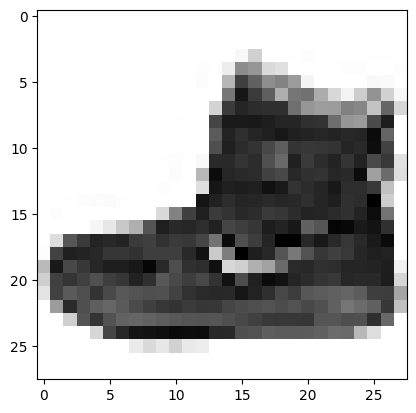

In [20]:
plt.imshow(X_train[0],cmap='Greys')

In [21]:
y_test[1] 
class_labels = ['T-shirt/top','Trowser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Anklel boot' ]


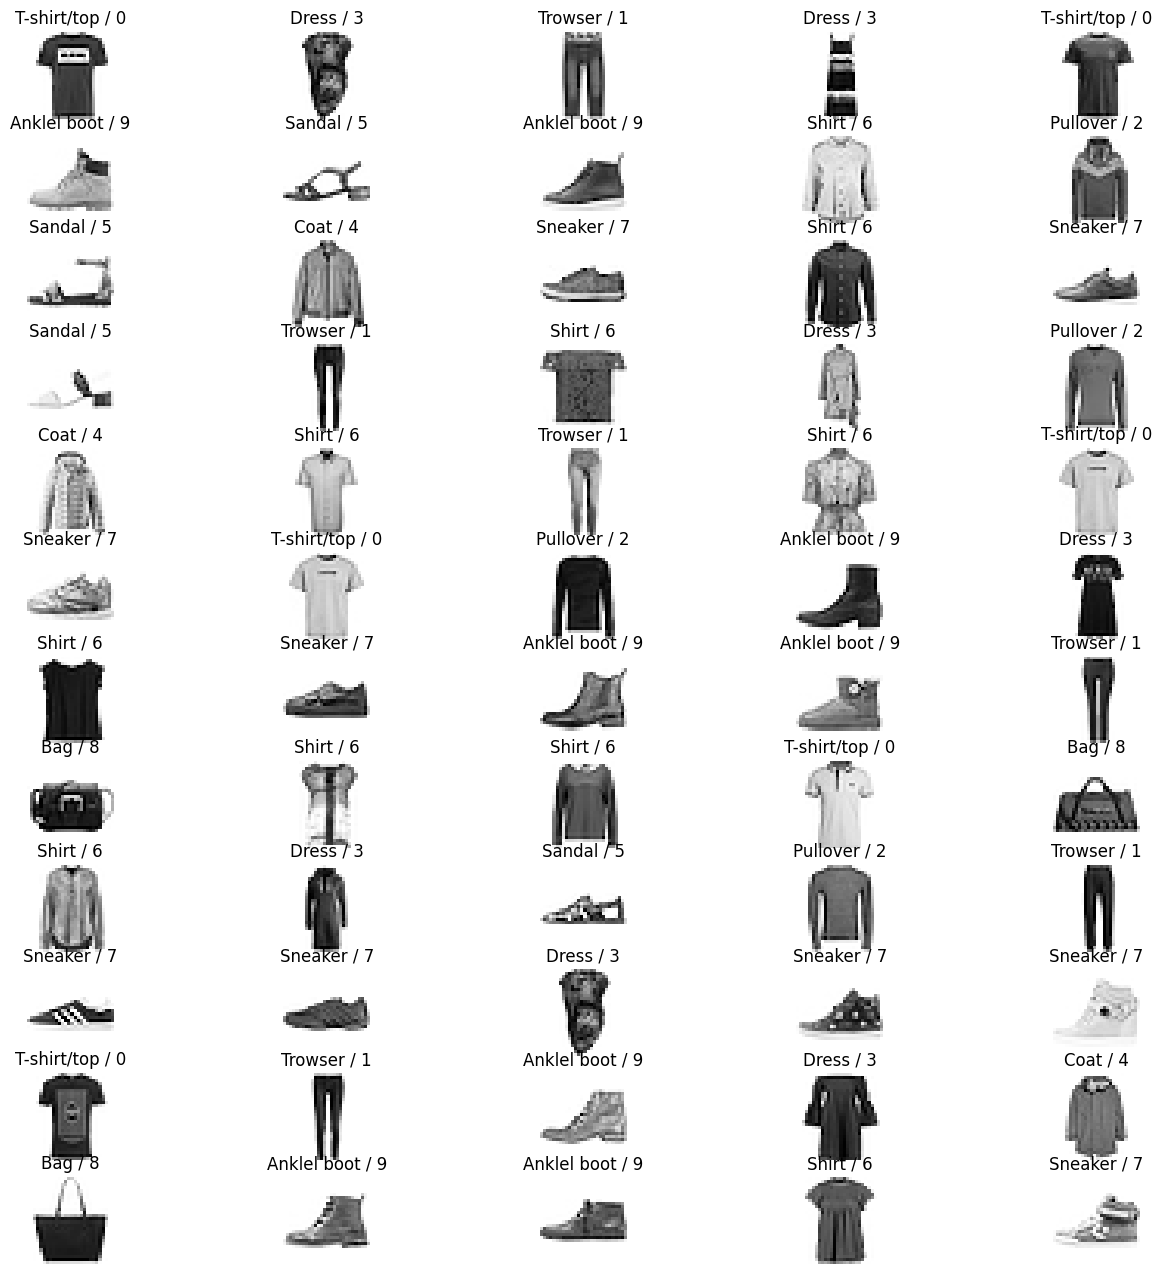

In [22]:
plt.figure(figsize=(16,16))

j = 1
for i in np.random.randint(0,1000,60): 
    plt.subplot(12,5,j); # it donates the rows and columns required for the 60 images
    j += 1 
    plt.imshow(X_train[i],cmap="Greys") 
    plt.axis('off') # off the axis 
    plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i])) # plot and number show karenge
    # randomly number liya

#### change dimensions

In [23]:
X_train.ndim
X_train.shape 
X_test.shape

(10000, 28, 28)

In [24]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_train,-1)


In [25]:
X_train.ndim # it becomes 4 dimensional 

4

### Featuring Scaling


In [26]:
X_train = X_train/255 
X_test = X_test/255 



In [27]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

# Split dataset

In [28]:
import sklearn
from sklearn.model_selection import train_test_split 
X_train , X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [29]:
X_train.shape,y_train.shape

((48000, 28, 28, 1), (48000,))

In [30]:
X_val.shape,y_val.shape

((12000, 28, 28, 1), (12000,))

# CNN Architecture

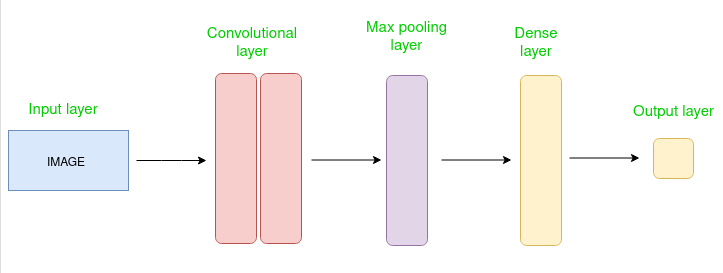

#### it is the extended version of the artificial neural network. 
#### it is predominantly used to extract the feature from the grid matrix dataset. 
#### it is consist of multiple layers: 
- input layer.
- convolution layer.
- max pooling layer.
- dense layer
- output laye. 

#### Input layer: convolution layers helps in applying the filter to the input image. 
#### Pooling layer: it helps in downsampling the image to reduce the computation power. 
#### Fully connected layer: it helps in making the final prediction. 
#### The network learns the optimal filters through backpropagation and gradient descent.



## How Convolution layers works ? 

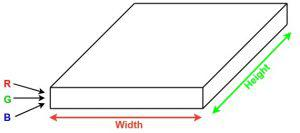
- imagine you have an image with the parameters called height(i.e channels which can be red,green and blue), width(it represents the dimension of an image) and length.
- Now imagine taking a small patch of this image and running a small neural network, called a filter or kernel on it, with say, K outputs and representing them vertically.
- Now imagine taking a small patch of this image and running a small neural network, called a filter or kernel on it, with say, K outputs and representing them vertically. Now slide that neural network across the whole image, as a result, we will get another image with different widths, heights, and depths. Instead of just R, G, and B channels now we have more channels but lesser width and height. This operation is called Convolution. If the patch size is the same as that of the image it will be a regular neural network. Because of this small patch, we have fewer weights. - E.g,
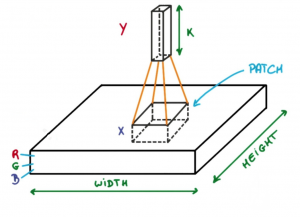


### Let us talk about the mathematics involved in whole convolution network ? 
- Convolution layers consist of a set of learnable filters (or kernels) having small widths and heights and the same depth as that of input volume (3 if the input layer is image input).
- For example, if we have to run convolution on an image with dimensions 34x34x3. The possible size of filters can be axax3, where ‘a’ can be anything like 3, 5, or 7 but smaller as compared to the image dimension.
  


- During the orward pass, we slide each filter across the whole input volume step by step where each step is called stride (which can have a value of 2, 3, or even 4 for high-dimensional images) and compute the dot product between the kernel weights and patch from input volume.

- As we slide our filters we’ll get a 2-D output for each filter and we’ll stack them together as a result, we’ll get output volume having a depth equal to the number of filters. The network will learn all the filters.


### What kind of layers used in building the neural network ?? 
- **Input Layer**: It’s the layer in which we give input to our model. In CNN, Generally, the input will be an image or a sequence of images. This layer holds the raw input of the image with width 32, height 32, and depth 3.
- **Convolution Layer**: it is used to extract the features from the input dataset.It applies a set of learnable filters known as the kernels to the input images.The filters/kernels are smaller matrices usually 2×2, 3×3, or 5×5 shape. it slides over the input image data and computes the dot product between kernel weight and the corresponding input image patch. The output of this layer is referred as feature maps. Suppose we use a total of 12 filters for this layer we’ll get an output volume of dimension 32 x 32 x 12.3.

- **Activation Layer:**: By adding an activation function to the output of the preceding layer, activation layers add nonlinearity to the network. it will apply an element-wise activation function to the output of the convolution layer. Some common activation functions are RELU: max(0, x),  Tanh, Leaky RELU, etc. The volume remains unchanged hence output volume will have dimensions 32 x 32 x 12

 

- **Pooling layer:** This layer is periodically inserted in the covnets and its main function is to reduce the size of volume which makes the computation fast reduces memory and also prevents overfitting. Two common types of pooling layers are max pooling and average pooling. If we use a max pool with 2 x 2 filters and stride 2, the resultant volume will be of dimension 16x16x12. 
 


- **Flattening:** The resulting feature maps are flattened into a one-dimensional vector after the convolution and pooling layers so they can be passed into a completely linked layer for categorization or regression.
  
- **Output Layer:** The output from the fully connected layers is then fed into a logistic function for classification tasks like sigmoid or softmax which converts the output of each class into the probability score of each classk

- **Fully Connected Layers:** It takes the input from the previous layer and computes the final classification or regression task.


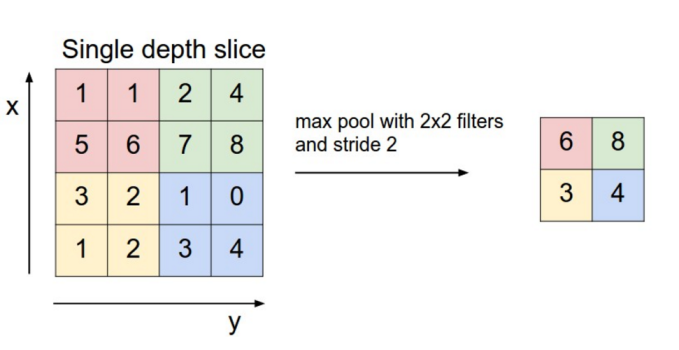 

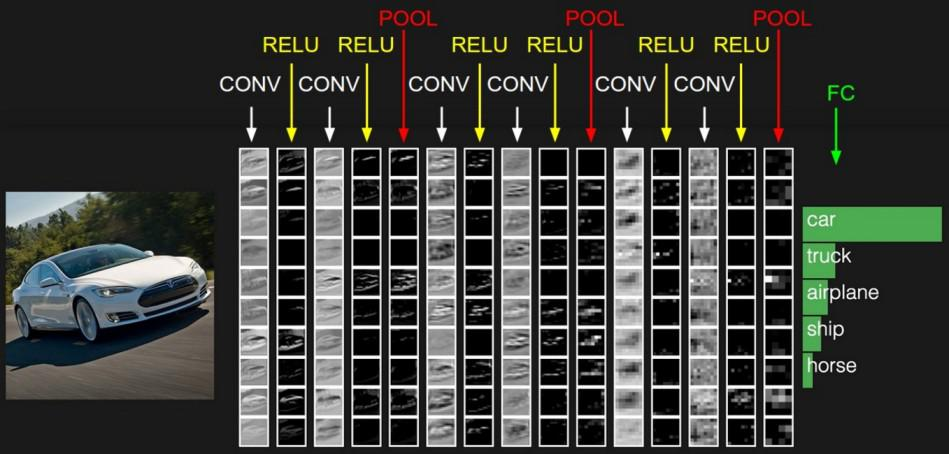

### Let us apply an cnn on an image as given below 


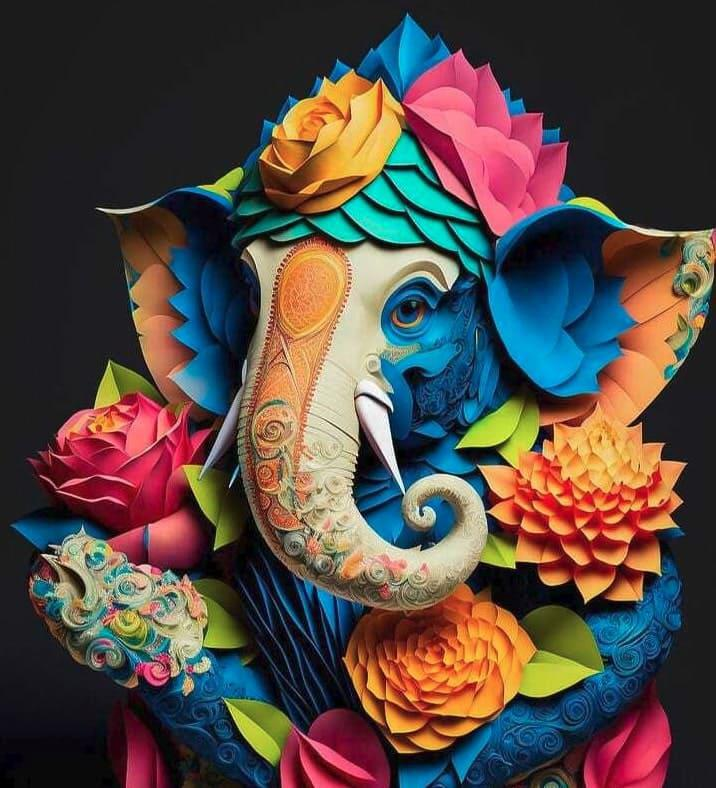mage.




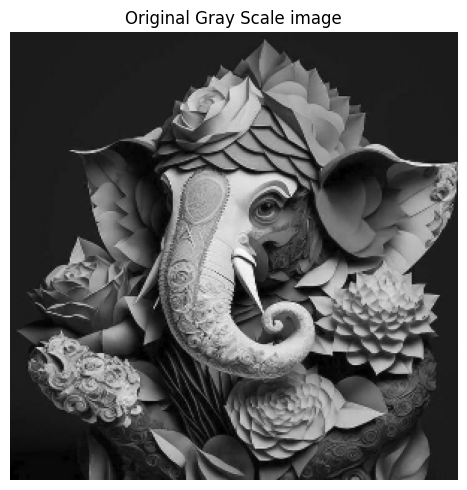

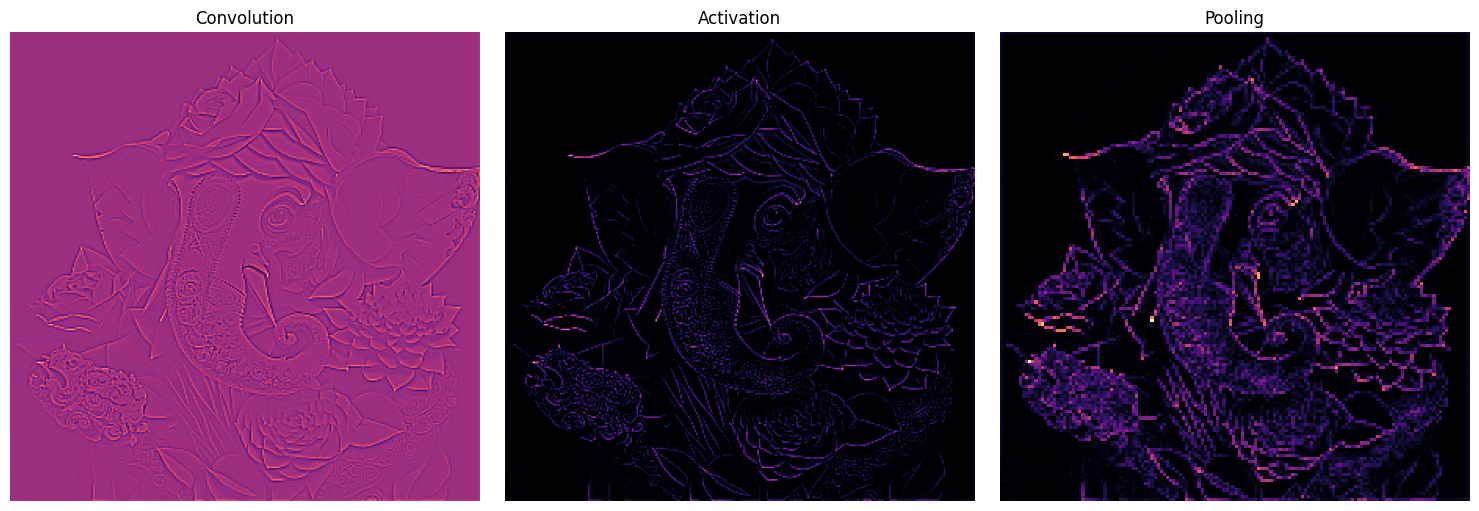

In [6]:
# import the necessary libraries 
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from itertools import product 

# set the param 
plt.rc('figure', autolayout=True) 
plt.rc('image', cmap='magma') 

# define the kernel 
kernel = tf.constant([[-1, -1, -1], 
					[-1, 8, -1], 
					[-1, -1, -1], 
				]) 

# load the image 
image = tf.io.read_file('Ganesh.jpg') 
image = tf.io.decode_jpeg(image, channels=1) 
image = tf.image.resize(image, size=[300, 300]) 

# plot the image 
img = tf.squeeze(image).numpy() 
plt.figure(figsize=(5, 5)) 
plt.imshow(img, cmap='gray') 
plt.axis('off') 
plt.title('Original Gray Scale image') 
plt.show(); 


# Reformat 
image = tf.image.convert_image_dtype(image, dtype=tf.float32) 
image = tf.expand_dims(image, axis=0) 
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1]) 
kernel = tf.cast(kernel, dtype=tf.float32) 

# convolution layer 
conv_fn = tf.nn.conv2d 

image_filter = conv_fn( 
	input=image, 
	filters=kernel, 
	strides=1, # or (1, 1) 
	padding='SAME', 
) 

plt.figure(figsize=(15, 5)) 

# Plot the convolved image 
plt.subplot(1, 3, 1) 

plt.imshow( 
	tf.squeeze(image_filter) 
) 
plt.axis('off') 
plt.title('Convolution') 

# activation layer 
relu_fn = tf.nn.relu 
# Image detection 
image_detect = relu_fn(image_filter) 

plt.subplot(1, 3, 2) 
plt.imshow( 
	# Reformat for plotting 
	tf.squeeze(image_detect) 
) 

plt.axis('off') 
plt.title('Activation') 

# Pooling layer 
pool = tf.nn.pool 
image_condense = pool(input=image_detect, 
							window_shape=(2, 2), 
							pooling_type='MAX', 
							strides=(2, 2), 
							padding='SAME', 
							) 

plt.subplot(1, 3, 3) 
plt.imshow(tf.squeeze(image_condense)) 
plt.axis('off') 
plt.title('Pooling') 
plt.show() 


# Tutorial number 4: Building First CNN 

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

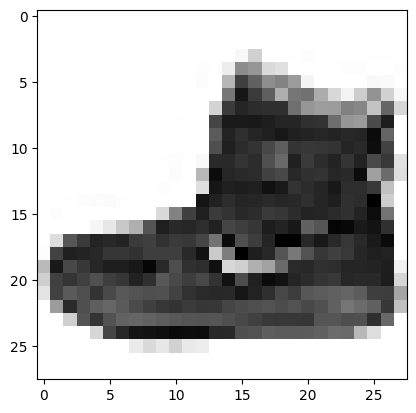

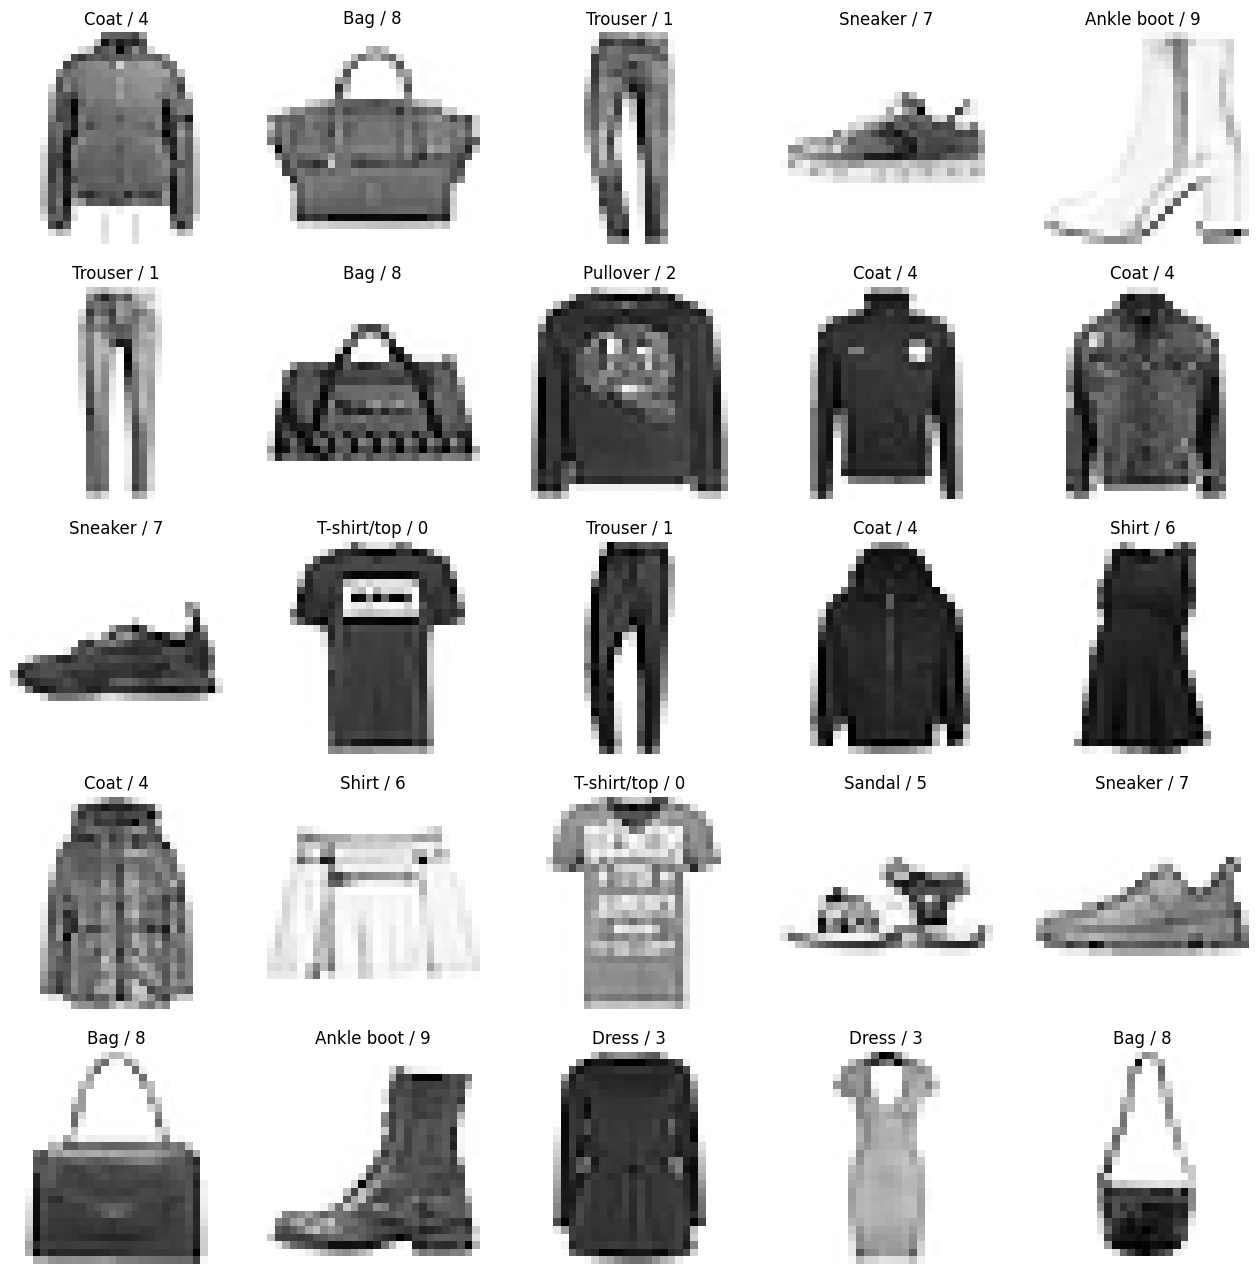

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras # to build Neural Network

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data() # load dataset from  keras

# Print shape of Data
 
X_train.shape, y_train.shape

X_test.shape, y_test.shape
 
X_train[0] # image data in 2d numpy array shape 28x28 pixel
 
y_train[0] #9 => Ankle boot
 
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

plt.imshow(X_train[0], cmap='Greys')
 
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))
 
X_train.shape
 
X_train.ndim
 
# expected conv2d_input to have 4 dimensions, but got array with shape (28, 28, 1)
# so we have increase the dimention 3 to 4
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
 
X_train.ndim
 
"""## Feature Scaling"""
 
X_train = X_train/255
X_test = X_test/255
 
"""## Split Dataset"""
 
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)
 
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape
 


### Training and testing of the cnn model

# Test the model

In [3]:
#Building CNN model
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])
 
cnn_model.summary() # get the summary of model
 
# complie the model
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
# train cnn model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [4]:
y_pred = cnn_model.predict(X_test)
y_pred.round(2)
 
y_test
 
cnn_model.evaluate(X_test, y_test)


313/313 [==============================] - 2s 8ms/step - loss: 0.2859 - accuracy: 0.8944


[0.2859196364879608, 0.8944000005722046]

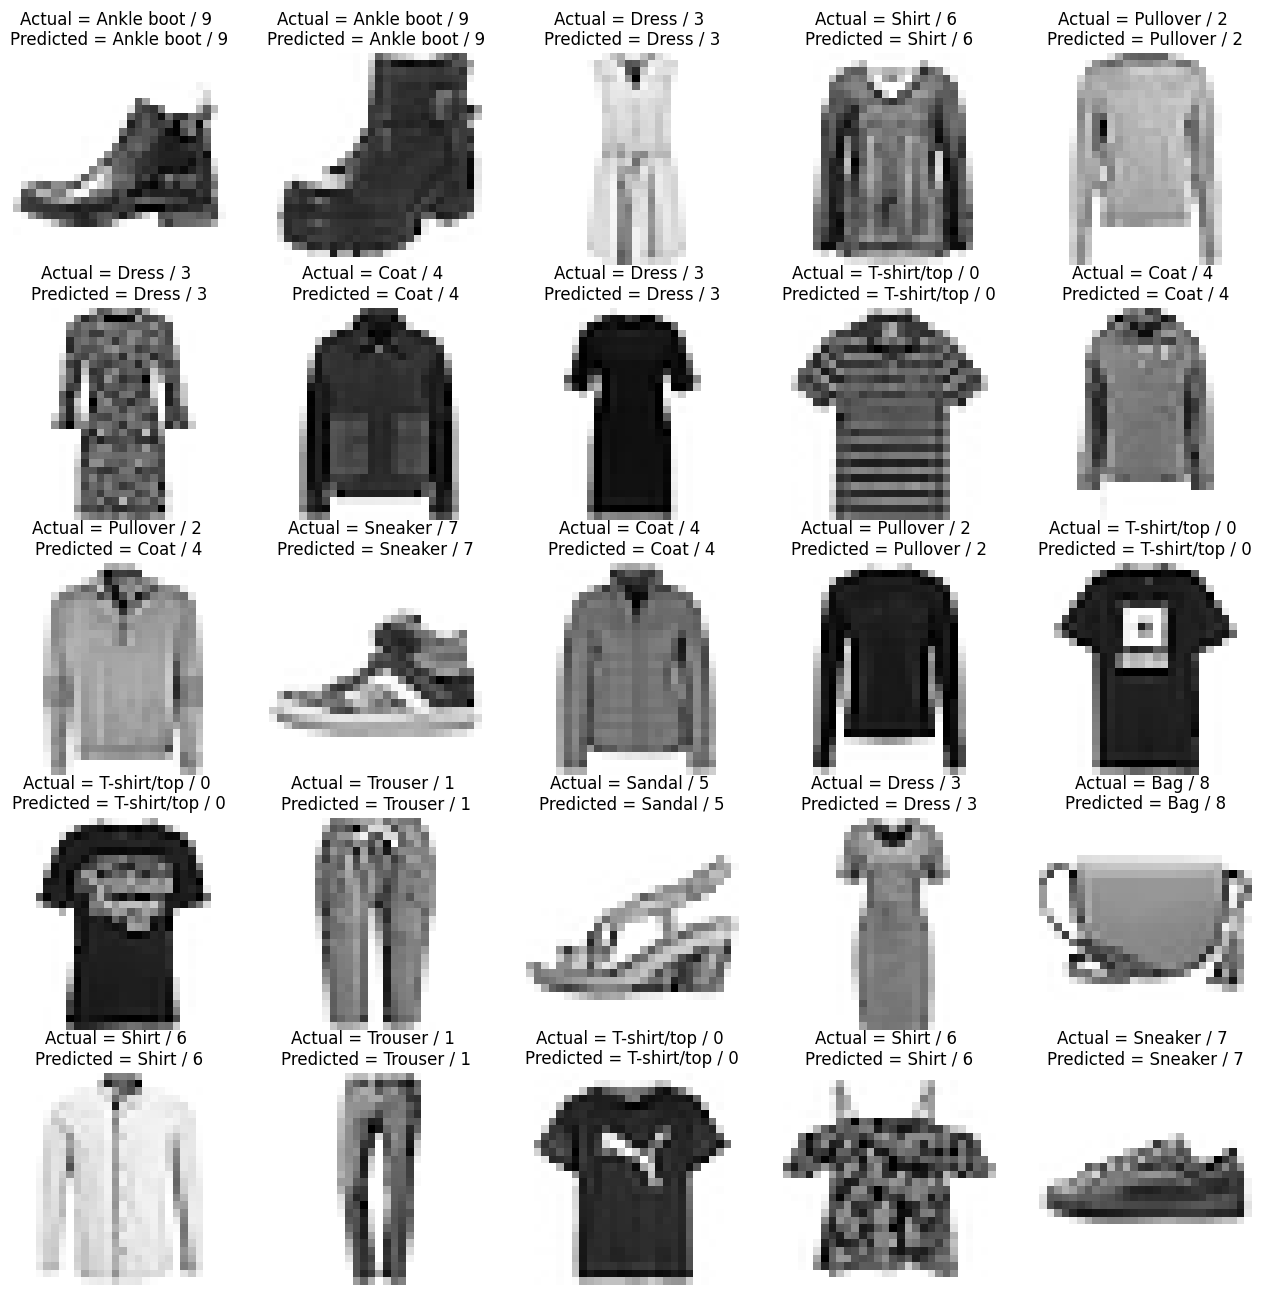

In [5]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

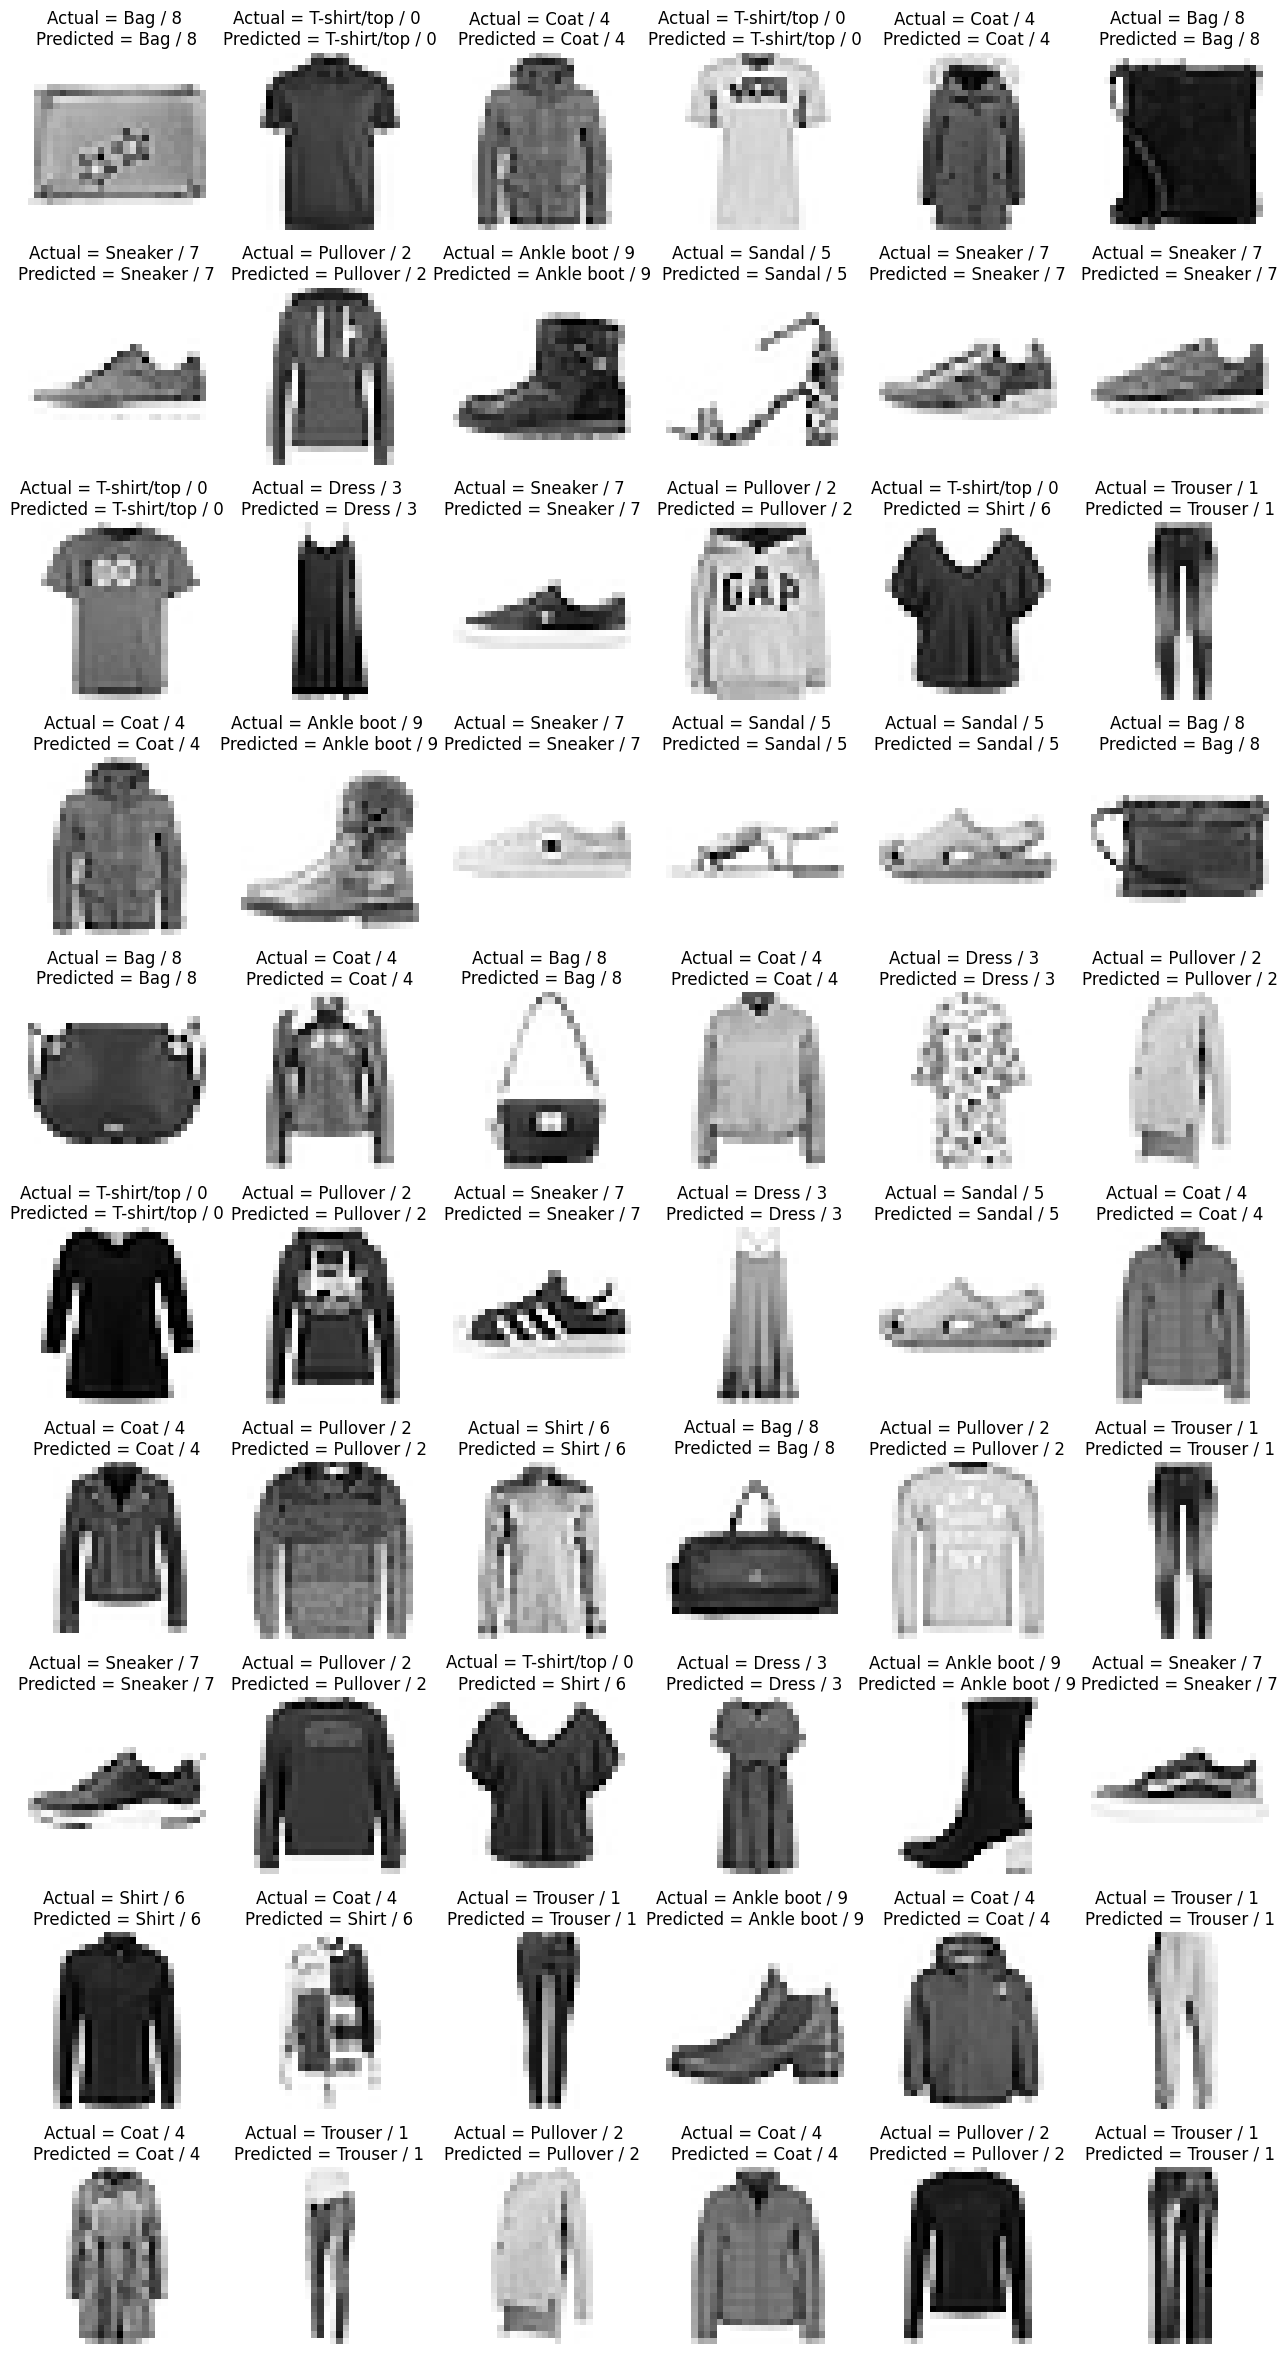

In [6]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')


              precision    recall  f1-score   support

 T-shirt/top       0.83      0.86      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.86      0.83      0.84      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.83      0.83      0.83      1000
      Sandal       0.98      0.94      0.96      1000
       Shirt       0.71      0.71      0.71      1000
     Sneaker       0.91      0.98      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



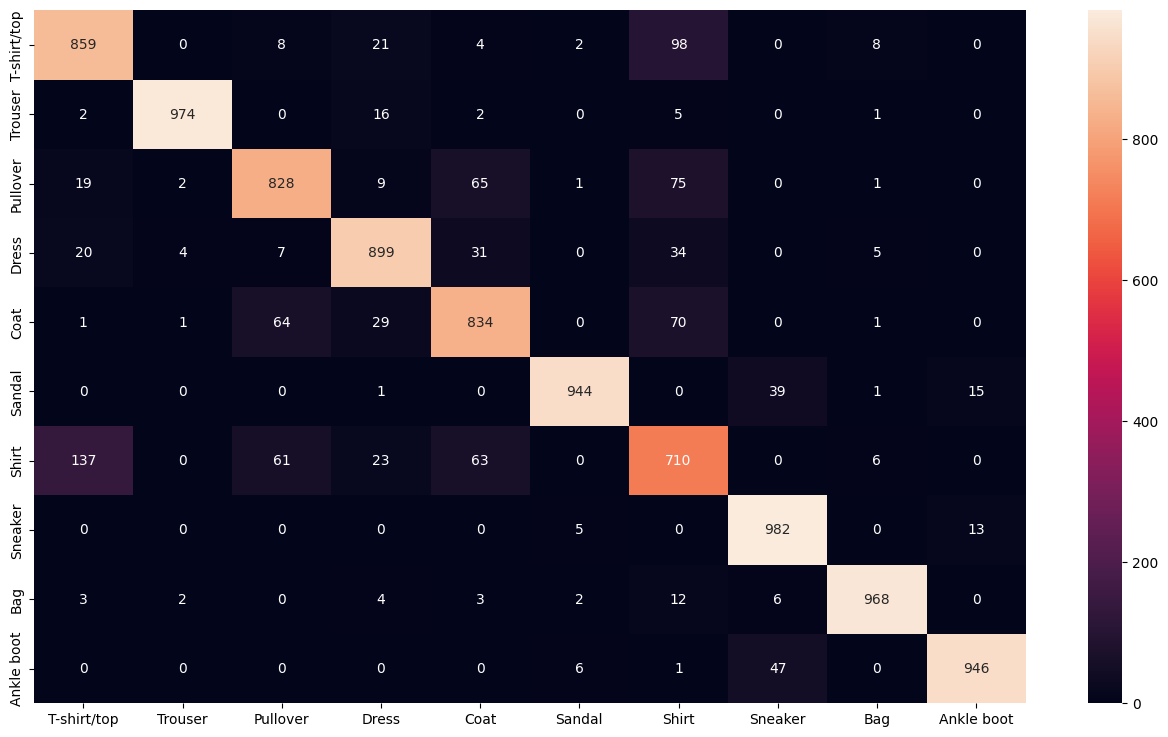

In [7]:
from sklearn.metrics import confusion_matrix
 
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)
 
# show cm 
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

## Save Model

In [10]:
path = 'E:/MachineLearning/SignDetectionSystemUsingMachineLearning/Model/model.h5' 

cnn_model.save_weights(path)
